In [1]:
from ecoevocrm.consumer_resource_system import *
import ecoevocrm.utils as utils
import ecoevocrm.viz as viz
import ecoevocrm.coarse_graining as cg

In [2]:
import matplotlib.pyplot as plt

--------

### Set the number of resources

In [3]:
L = 20

### Define the ancestral phenotype (traits vector)

In [4]:
anc_phenotype = utils.random_matrix(shape=(1, L), mode='binomial')
anc_phenotype

array([[1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]])

### Define the system biochemistry (trait/resource interactions)

In [5]:
J = utils.random_matrix((L, L), 'tikhonov_sigmoid')

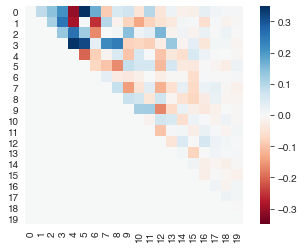

In [6]:
viz.matrix_plot(J)

### Parameterize and instantiate the Consumer-Resource System

In [7]:
anc_system = ConsumerResourceSystem(sigma=anc_phenotype, 
                                    b=1, k=1e10, c=0.1, chi=0.5, J=J, mu=1e-10,
                                    resource_consumption_mode='fast_resource_eq',
                                    threshold_min_rel_abundance=1e-6,
                                    N_init=1, R_init=1)

### Simulate dynamics

In [8]:
anc_system.run(T=1000)

### Visualize results

In [23]:
type_colors = viz.color_types_by_phylogeny(anc_system.strain_pool)

<AxesSubplot:>

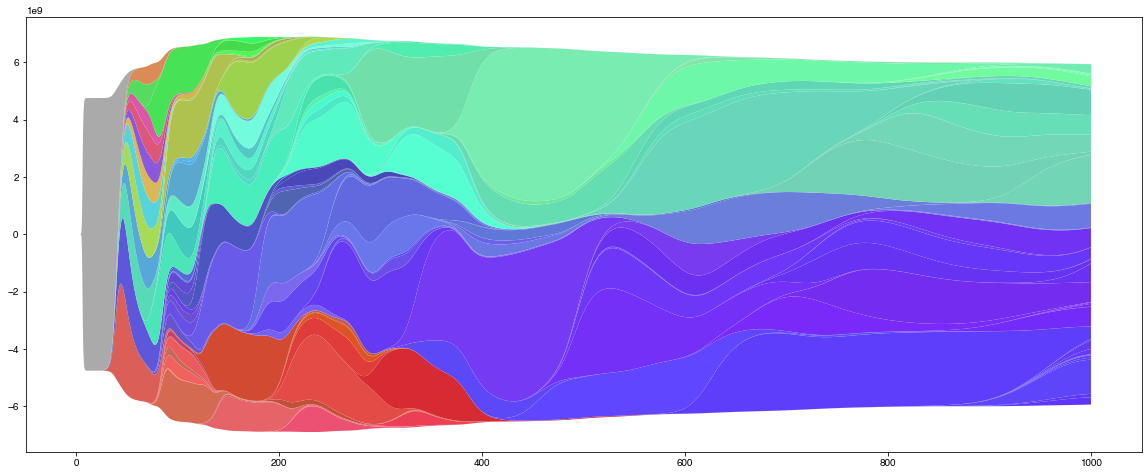

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
viz.stacked_abundance_plot(anc_system, ax=ax, type_colors=type_colors)

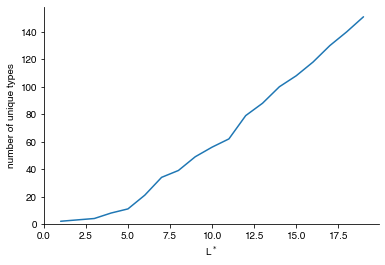

In [11]:
viz.Lstar_types_plot(anc_system)

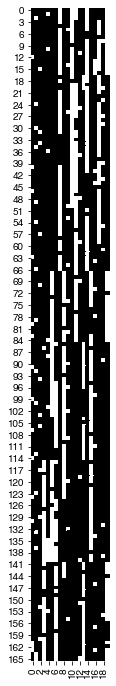

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(3, 12))
viz.matrix_plot(anc_system.get_extant_strain_pool().sigma, ax=ax)

In [13]:
anc_system.N_series[:, -1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [14]:
for rep in 50:
    my_system = anc_system.get_extant_community()
    my_system.run()

TypeError: 'int' object is not iterable